In [16]:
import pystan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [8]:
X = pd.read_csv('X.csv', index_col=0)
expected = pd.read_csv('expected.csv', index_col=0)
cases = pd.read_csv('cases.csv', index_col=0)
adj = pd.read_csv('adj.csv', index_col=0)

X = np.matrix(X)
expected = np.array(expected['expected'])
cases = np.array(cases['observed'])
adj = np.matrix(adj)

In [9]:
cancer_dat = {'n': X.shape[0],
              'p': X.shape[1],
              'X': X,
              'y': cases,
              'log_offset': np.log(expected),
              'W': adj}

In [17]:
fit = pystan.stan(file='scot.stan', data=cancer_dat, iter=1000, chains=4)

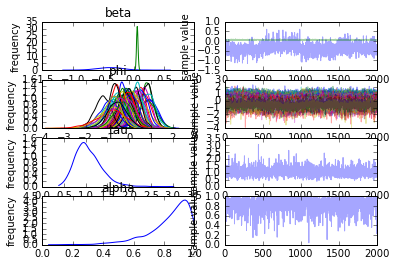

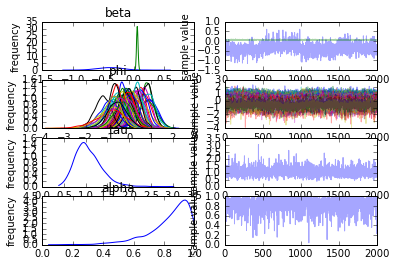

In [15]:
fit.plot()